In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import os
import matplotlib.gridspec as gridspec
import copy
import seaborn as sns
import pandas as pd

In [21]:
subject_id = "cz"

def file_handle(subject_id):
  files = os.listdir()
  for file in files:
    if subject_id in file and "bdf_L" in file:
      bdf_L_f = file
    if subject_id in file and "bdf_R" in file:
      bdf_R_f = file
    if subject_id in file and "vf_L" in file:
      vf_L_f = file
    if subject_id in file and "vf_R" in file:
      vf_R_f = file

  with open(bdf_L_f, 'r') as json_file:
    bdf_L = json.load(json_file)
  with open(bdf_R_f, 'r') as json_file:
    bdf_R = json.load(json_file)
  with open(vf_L_f, 'r') as json_file:
    vf_L = json.load(json_file)
  with open(vf_R_f, 'r') as json_file:
    vf_R = json.load(json_file)

  return bdf_L, bdf_R, vf_L, vf_R

bdf_L, bdf_R, vf_L, vf_R= file_handle(subject_id)

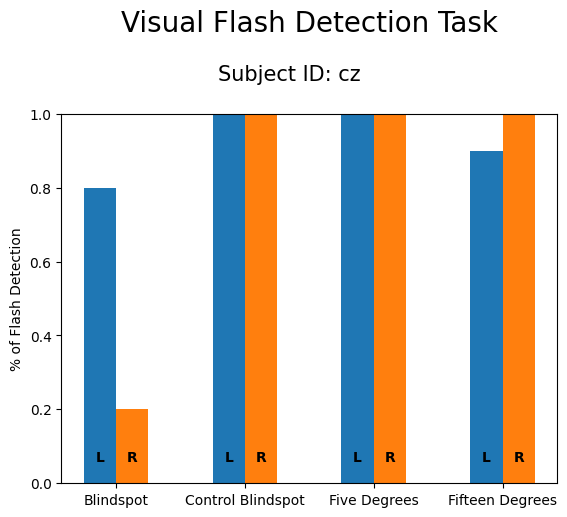

In [22]:
# 0 = left bs
# 1 = right bs
# 2 = 15 top
# 3 = 5 top
# 4 = 5 bottom
# 5 = 15 bottom
# Left-Right Convention

vf_bs = [vf_L["Present"]['0']['onep'], vf_R["Present"]['1']['onep']]
vf_control = [vf_L["Present"]['1']['onep'], vf_R["Present"]['0']['onep']]
vf_five = [(vf_L["Present"]['3']['onep'] + vf_L["Present"]['4']['onep'])/2 , (vf_R["Present"]['3']['onep']+ vf_R["Present"]['4']['onep'])/2]
vf_fifteen = [(vf_L["Present"]['2']['onep']+ vf_L["Present"]['5']['onep'])/2, (vf_R["Present"]['2']['onep']+ vf_R["Present"]['5']['onep'])/2]

species = ('Blindspot','Control Blindspot', 'Five Degrees', 'Fifteen Degrees')
penguin_means = {
    'Left Eye': (vf_bs[0], vf_control[0], vf_five[0], vf_fifteen[0]),
    'Right Eye': (vf_bs[1], vf_control[1], vf_five[1], vf_fifteen[1])
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)

    # Add "L" and "R" labels inside each bar
    for i, val in enumerate(measurement):
        ax.text(x[i] + offset, 0.05, attribute[0], ha='center', va='bottom', color='black', fontweight='bold')

    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of Flash Detection')
ax.set_title('Visual Flash Detection Task',y = 1.2,fontsize = 20)
fig.text(0.37, .95, f'Subject ID: {subject_id} ', fontsize=15)
ax.set_xticks(x + width * (len(penguin_means) - 1) / 2)  # Correct x-axis tick positions
ax.set_xticklabels(species)
ax.set_ylim(0, 1)

plt.show()
fig.savefig(f'vf_bar_raw_{subject_id}.png', bbox_inches='tight', dpi=300)

<ipython-input-58-ece4e1976949>:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues', 256)


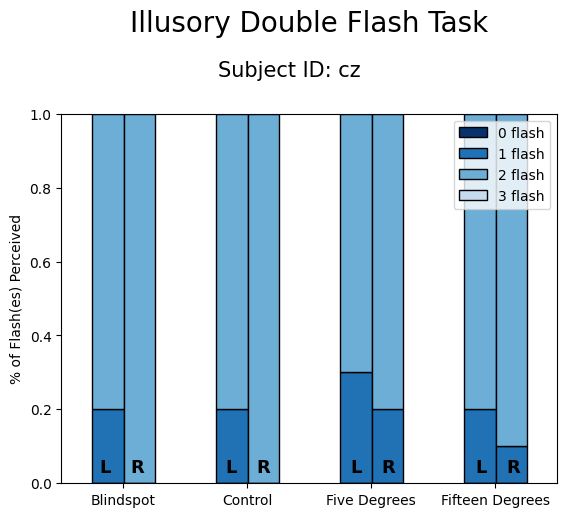

In [58]:
# (left, 15/5, 0 flash)
l50 = (bdf_L['Present']['3']['zerop'] + bdf_L['Present']['4']['zerop'])/2
l51 = (bdf_L['Present']['3']['onep'] + bdf_L['Present']['4']['onep'])/2
l52 = (bdf_L['Present']['3']['twop'] + bdf_L['Present']['4']['twop'])/2
l53 = (bdf_L['Present']['3']['threep'] + bdf_L['Present']['4']['threep'])/2
l150 = (bdf_L['Present']['2']['zerop'] + bdf_L['Present']['5']['zerop'])/2
l151 = (bdf_L['Present']['2']['onep'] + bdf_L['Present']['5']['onep'])/2
l152 = (bdf_L['Present']['2']['twop'] + bdf_L['Present']['5']['twop'])/2
l153 = (bdf_L['Present']['2']['threep'] + bdf_L['Present']['5']['threep'])/2
r50 = (bdf_R['Present']['3']['zerop'] + bdf_R['Present']['4']['zerop'])/2
r51 = (bdf_R['Present']['3']['onep'] + bdf_R['Present']['4']['onep'])/2
r52 = (bdf_R['Present']['3']['twop'] + bdf_R['Present']['4']['twop'])/2
r53 = (bdf_R['Present']['3']['threep'] + bdf_R['Present']['4']['threep'])/2
r150 = (bdf_R['Present']['2']['zerop'] + bdf_R['Present']['5']['zerop'])/2
r151 = (bdf_R['Present']['2']['onep'] + bdf_R['Present']['5']['onep'])/2
r152 = (bdf_R['Present']['2']['twop'] + bdf_R['Present']['5']['twop'])/2
r153 = (bdf_R['Present']['2']['threep'] + bdf_R['Present']['5']['threep'])/2

# # 'Blindspot': ['0 flash', '1 flash', '2 flash', '3 flash'].
# # 'Control Blindspot': ['0 flash', '1 flash', '2 flash', '3 flash'].
# # 'Five Degrees': ['0 flash', '1 flash', '2 flash', '3 flash'].
# # 'Fifteen Degrees':['0 flash', '1 flash', '2 flash', '3 flash'].

left_values = [
  [bdf_L['Present']['0']['zerop'],bdf_L['Present']['0']['onep'],bdf_L['Present']['0']['twop'],bdf_L['Present']['0']['threep']],
  [bdf_L['Present']['1']['zerop'],bdf_L['Present']['1']['onep'],bdf_L['Present']['1']['twop'],bdf_L['Present']['1']['threep']],
  [l50,l51,l52,l53],
  [l150,l151,l152,l153]
 ]

right_values = [
  [bdf_R['Present']['1']['zerop'],bdf_R['Present']['1']['onep'],bdf_R['Present']['1']['twop'],bdf_R['Present']['1']['threep']],
  [bdf_R['Present']['0']['zerop'],bdf_R['Present']['0']['onep'],bdf_R['Present']['0']['twop'],bdf_R['Present']['0']['threep']],
  [r50,r51,r52,r53],
  [r150,r151,r152,r153]
 ]


left = pd.DataFrame(left_values,
                   index=['Blindspot','Control', 'Five Degrees', 'Fifteen Degrees'],
                   columns=["0 flash", "1 flash", "2 flash", "3 flash"])
right = pd.DataFrame(right_values,
                   index=['Blindspot','Control', 'Five Degrees', 'Fifteen Degrees'],
                   columns=["0 flash", "1 flash", "2 flash", "3 flash"])


dfall = [left, right]
labels = ["0 flash", "1 flash", "2 flash", "3 flash"]

cmap = plt.cm.get_cmap('Blues', 256)

dfall = [left, right]
labels = ["0 flash", "1 flash", "2 flash", "3 flash"]

n_df = len(dfall)
n_col = len(dfall[0].columns)
n_ind = len(dfall[0].index)
axe = plt.subplot(111)


for idx, df in enumerate(dfall):
    # Create a list of colors from the reversed 'Blues' colormap, with the colors sorted in reverse order.
    # The color for "3 flash" will be at the beginning of the list, and "0 flash" will be at the end.
    colors = [cmap(i) for i in range(255, -1, -int(256 / n_col))]
    axe = df.plot(
        kind="bar",
        linewidth=1,
        stacked=True,
        edgecolor='black',
        ax=axe,
        legend=False,
        grid=False,
        color=colors,
    )

h, l = axe.get_legend_handles_labels()
for i in range(0, n_df * n_col, n_col):
    for j, pa in enumerate(h[i:i + n_col]):
        for rect in pa.patches:
            rect.set_x(rect.get_x() + .76 / float(n_df + 1) * i / float(n_col))  # Shifting to the right
            rect.set_width(.76 / float(n_df + 1))



# h, l = axe.get_legend_handles_labels()
# for i in range(0, n_df * n_col, n_col):
#     for j, pa in enumerate(h[i:i + n_col]):
#         for rect in pa.patches:
#             rect.set_x(rect.get_x() - 1 / float(n_df +1 ) * i / float(n_col))
#             rect.set_width(1 / float(n_df+ 1  ))


axe.set_xticklabels(df.index, rotation=0)
axe.set_title('Illusory Double Flash Task',y = 1.2,fontsize = 20)
axe.set_ylabel('% of Flash(es) Perceived')
plt.text(0.76, 1.1, f'Subject ID: {subject_id} ', fontsize=15)
for i in np.arange(-.19,3,1.01):
  plt.text(i, 0.03, "L", color='black', fontweight='bold', fontsize=13)
  plt.text(i+0.25, 0.03, "R", color='black', fontweight='bold', fontsize=13)
plt.legend(labels, loc='best')
plt.ylim(0,1)

plt.savefig(f'bdf_bar_raw_{subject_id}.png', bbox_inches='tight', dpi=300)

plt.show()




In [ ]:
# # Heatmap
# # data= [[1b0f,1b1f,1b2f]
# #        [2b0f,2b1f,2b2f]

# tempL = copy.deepcopy(bdf_L['Conditions'])
# tempR = copy.deepcopy(bdf_R['Conditions'])

# #LEFT
# #BS
# bs_La = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 1 and row[2] == 0])
# bs_Lb = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 1 and row[2] == 1])
# bs_Lc = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 1 and row[2] == 2])
# bs_Ld = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 2 and row[2] == 0])
# bs_Le = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 2 and row[2] == 1])
# bs_Lf = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 2 and row[2] == 2])
# #control
# c_La = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 1 and row[2] == 0])
# c_Lb = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 1 and row[2] == 1])
# c_Lc = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 1 and row[2] == 2])
# c_Ld = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 2 and row[2] == 0])
# c_Le = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 2 and row[2] == 1])
# c_Lf = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 2 and row[2] == 2])
# #five
# five_La = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 1 and row[2] == 0])
# five_Lb = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 1 and row[2] == 1])
# five_Lc = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 1 and row[2] == 2])
# five_Ld = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 2 and row[2] == 0])
# five_Le = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 2 and row[2] == 1])
# five_Lf = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 2 and row[2] == 2])
# #fifteen
# fif_La = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 1 and row[2] == 0])
# fif_Lb = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 1 and row[2] == 1])
# fif_Lc = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 1 and row[2] == 2])
# fif_Ld = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 2 and row[2] == 0])
# fif_Le = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 2 and row[2] == 1])
# fif_Lf = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 2 and row[2] == 2])

# #RIGHT
# #BS
# bs_Ra = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 1 and row[2] == 0])
# bs_Rb = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 1 and row[2] == 1])
# bs_Rc = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 1 and row[2] == 2])
# bs_Rd = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 2 and row[2] == 0])
# bs_Re = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 2 and row[2] == 1])
# bs_Rf = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 2 and row[2] == 2])
# #control
# c_Ra = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 1 and row[2] == 0])
# c_Rb = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 1 and row[2] == 1])
# c_Rc = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 1 and row[2] == 2])
# c_Rd = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 2 and row[2] == 0])
# c_Re = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 2 and row[2] == 1])
# c_Rf = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 2 and row[2] == 2])
# #five degrees
# five_Ra = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 1 and row[2] == 0])
# five_Rb = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 1 and row[2] == 1])
# five_Rc = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 1 and row[2] == 2])
# five_Rd = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 2 and row[2] == 0])
# five_Re = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 2 and row[2] == 1])
# five_Rf = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 2 and row[2] == 2])
# #fifteen degrees
# fif_Ra = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 1 and row[2] == 0])
# fif_Rb = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 1 and row[2] == 1])
# fif_Rc = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 1 and row[2] == 2])
# fif_Rd = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 2 and row[2] == 0])
# fif_Re = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 2 and row[2] == 1])
# fif_Rf = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 2 and row[2] == 2])

# matrixBS_L = [[bs_La,bs_Lb,bs_Lc],
#               [bs_Ld,bs_Le,bs_Lf]]
# matrixC_L = [[c_La,c_Lb,c_Lc],
#               [c_Ld,c_Le,c_Lf]]
# matrix5_L = [[five_La,five_Lb,five_Lc],
#               [five_Ld,five_Le,five_Lf]]
# matrix15_L = [[fif_La,fif_Lb,fif_Lc],
#               [fif_Ld,fif_Le,fif_Lf]]

# matrixBS_R = [[bs_Ra,bs_Rb,bs_Rc],
#               [bs_Rd,bs_Re,bs_Rf]]
# matrixC_R = [[c_Ra,c_Rb,c_Rc],
#               [c_Rd,c_Re,c_Rf]]
# matrix5_R = [[five_Ra,five_Rb,five_Rc],
#               [five_Rd,five_Re,five_Rf]]
# matrix15_R = [[fif_Ra,fif_Rb,fif_Rc],
#               [fif_Rd,fif_Re,fif_Rf]]


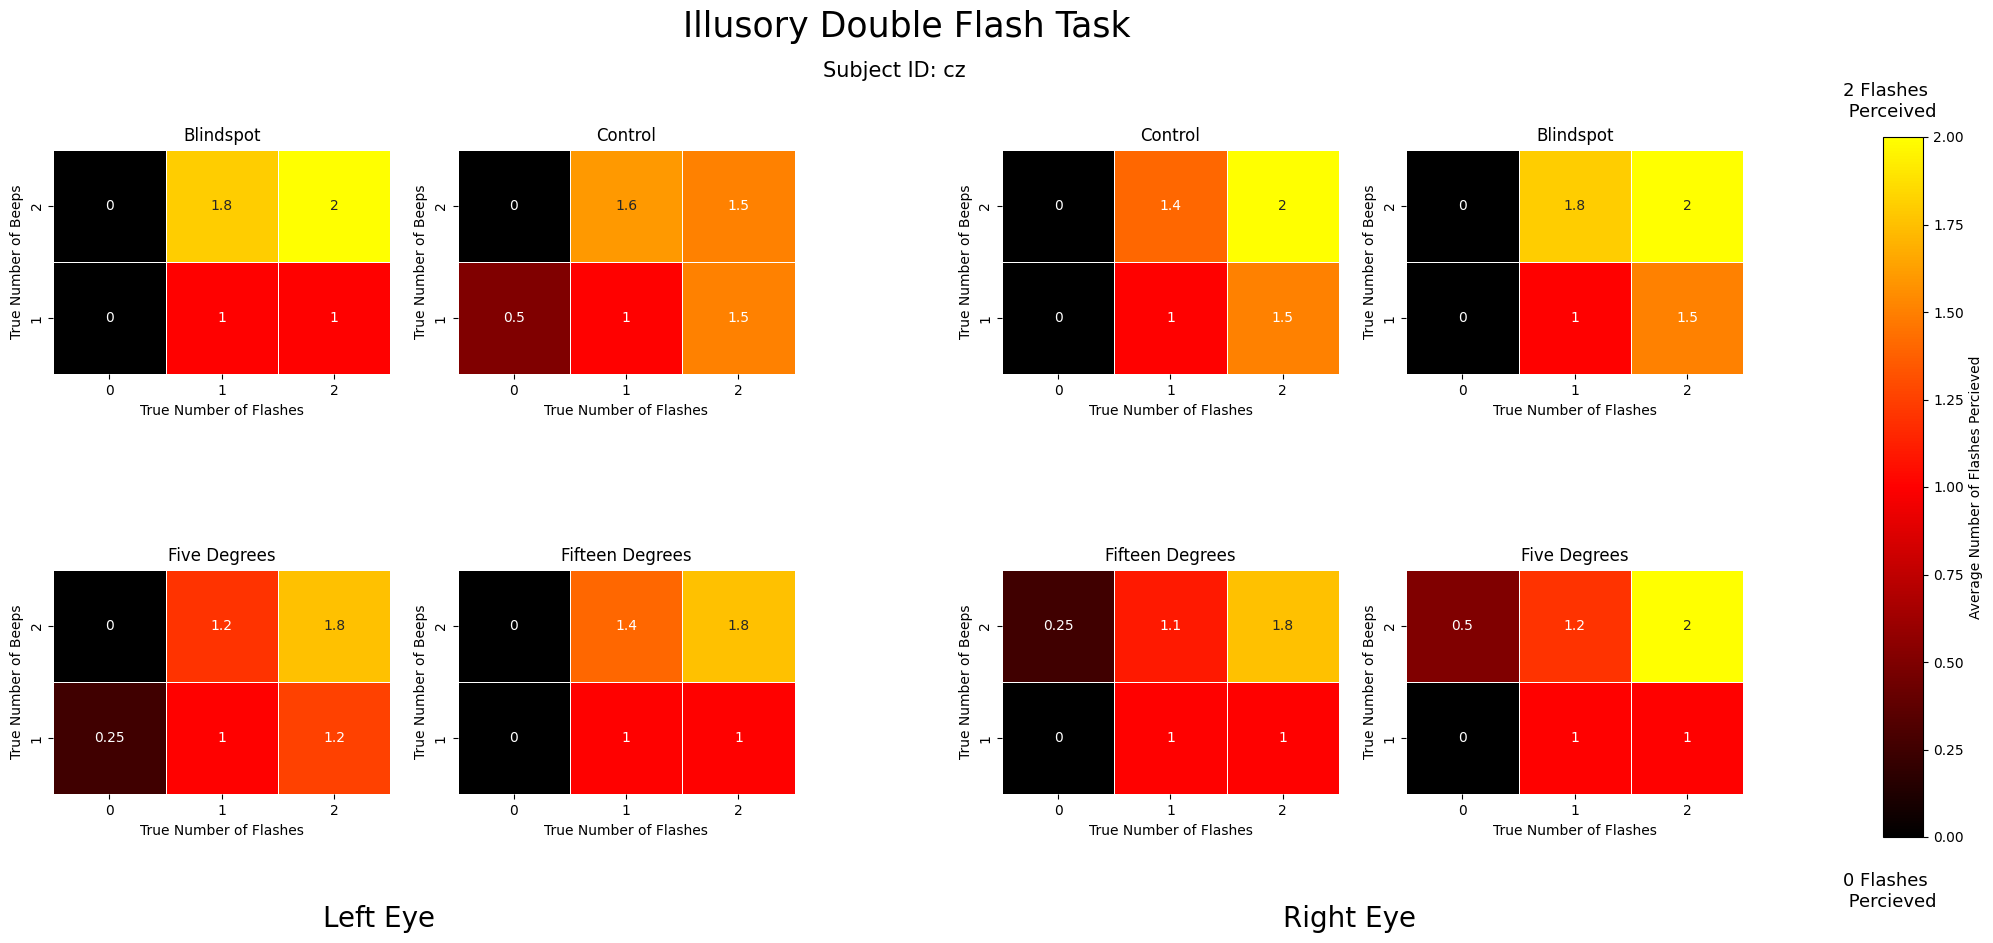

In [ ]:
# values = []
# for i in [matrixBS_L,matrixC_L,matrixC_R, matrixBS_R,matrix5_L,matrix15_L,matrix15_R,matrix5_R]:
#   values.append(i)

# cmap = mpl.colors.LinearSegmentedColormap.from_list('CustomMap', ['black', 'red', 'yellow'])

# fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# axs = axs.flatten()
# titles = ['Blindspot','Control','Control',"Blindspot",'Five Degrees',"Fifteen Degrees","Fifteen Degrees",'Five Degrees']

# for i in range(8):
#     ax = sns.heatmap(values[i], annot=True, cmap=cmap, linewidths=0.5, square=True, ax=axs[i], cbar=False, vmin = 0,vmax = 2)
#     ax.invert_yaxis()
#     ax.set_xlabel("True Number of Flashes")
#     ax.set_ylabel("True Number of Beeps")
#     ax.set_title(titles[i])
#     ax.set_yticklabels([1,2])

# left2, bottom2, width2, height2 = axs[2].get_position(fig).bounds
# left3, bottom3, width3, height3 = axs[3].get_position(fig).bounds
# left6, bottom6, width6, height6 = axs[6].get_position(fig).bounds
# left7, bottom7, width7, height7 = axs[7].get_position(fig).bounds
# axs[2].set_position([left2 + .07, bottom2, width2, height2])
# axs[3].set_position([left3 + .07, bottom3, width3, height3])
# axs[6].set_position([left6 + .07, bottom6, width6, height6])
# axs[7].set_position([left7 + .07, bottom7, width7, height7])

# cbar_ax = fig.add_axes([1.04, 0.13, 0.02, .7])
# cbar = fig.colorbar(ax.collections[0],cax = cbar_ax)
# cbar.set_label('Average Number of Flashes Percieved')

# fig.text(0.44, 0.93, "Illusory Double Flash Task", color='black', fontsize=25)
# fig.text(0.51, .89, f'Subject ID: {subject_id}', color='black', fontsize=15)
# fig.text(0.26, 0.04, 'Left Eye', color='black', fontsize=20)
# fig.text(0.74, 0.04, 'Right Eye', color='black', fontsize=20)
# fig.text(1.02, 0.85, '2 Flashes\n Perceived', color='black', fontsize=13)
# fig.text(1.02, 0.06, '0 Flashes\n Percieved', color='black', fontsize=13)

# # Show the plot
# plt.show()


# fig.savefig(f'bdf_heatmap_raw_{subject_id}.png', bbox_inches='tight', dpi=300)


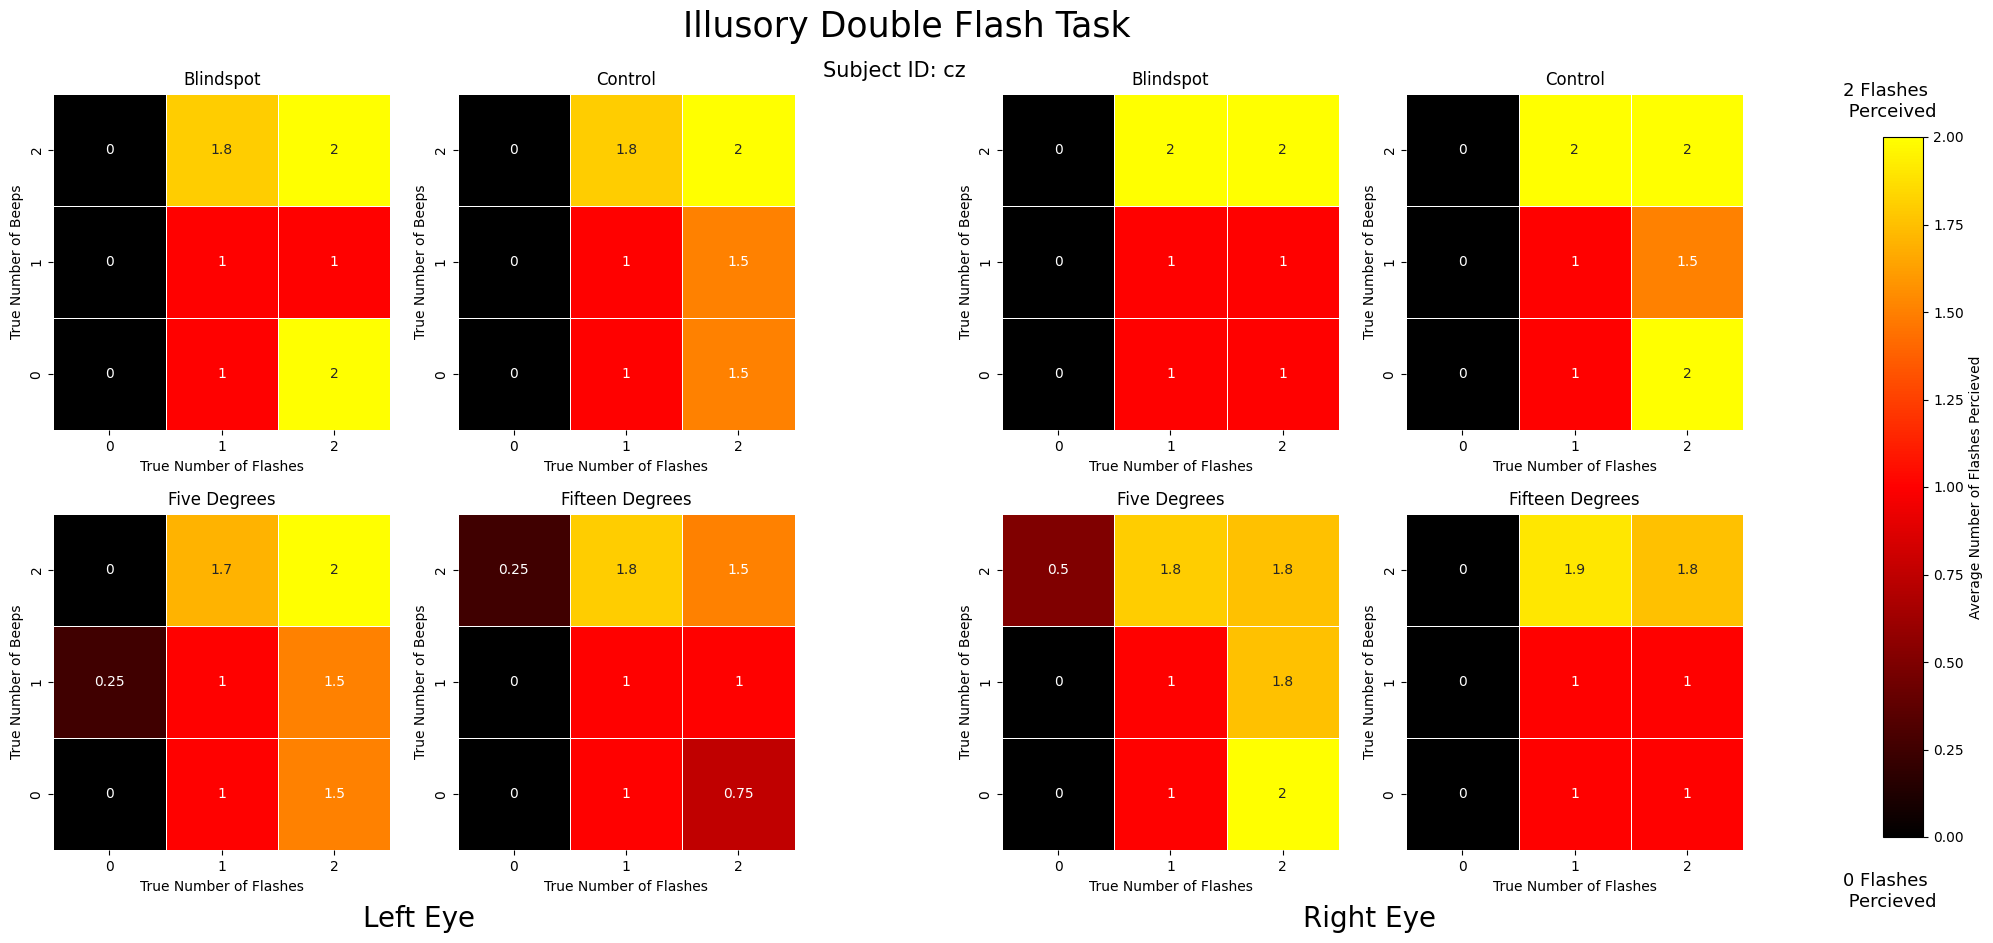

In [57]:
# Heatmap
# data= [[0b0f,0b1f,0b2f]  g,h,i
#        [1b0f,1b1f,1b2f]
#        [2b0f,2b1f,2b2f]

tempL = copy.deepcopy(bdf_L['Conditions'])
tempR = copy.deepcopy(bdf_R['Conditions'])

#LEFT
#BS
bs_Lg = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 0 and row[2] == 0])
bs_Lh = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 0 and row[2] == 1])
bs_Li = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 0 and row[2] == 2])
bs_La = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 1 and row[2] == 0])
bs_Lb = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 1 and row[2] == 1])
bs_Lc = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 1 and row[2] == 2])
bs_Ld = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 2 and row[2] == 0])
bs_Le = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 2 and row[2] == 1])
bs_Lf = np.mean([row[4] for row in tempL if row[0] == 0 and row[3] == 2 and row[2] == 2])
#control
c_Lg = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 0 and row[2] == 0])
c_Lh = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 0 and row[2] == 1])
c_Li = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 0 and row[2] == 2])
c_La = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 1 and row[2] == 0])
c_Lb = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 1 and row[2] == 1])
c_Lc = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 1 and row[2] == 2])
c_Ld = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 2 and row[2] == 0])
c_Le = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 2 and row[2] == 1])
c_Lf = np.mean([row[4] for row in tempL if row[0] == 1 and row[3] == 2 and row[2] == 2])
#five
five_Lg = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 0 and row[2] == 0])
five_Lh = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 0 and row[2] == 1])
five_Li = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 0 and row[2] == 2])
five_La = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 1 and row[2] == 0])
five_Lb = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 1 and row[2] == 1])
five_Lc = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 1 and row[2] == 2])
five_Ld = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 2 and row[2] == 0])
five_Le = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 2 and row[2] == 1])
five_Lf = np.mean([row[4] for row in tempL if (row[0] == 3 or row[0] == 4) and row[3] == 2 and row[2] == 2])
#fifteen
fif_Lg = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 0 and row[2] == 0])
fif_Lh = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 0 and row[2] == 1])
fif_Li = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 0 and row[2] == 2])
fif_La = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 1 and row[2] == 0])
fif_Lb = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 1 and row[2] == 1])
fif_Lc = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 1 and row[2] == 2])
fif_Ld = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 2 and row[2] == 0])
fif_Le = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 2 and row[2] == 1])
fif_Lf = np.mean([row[4] for row in tempL if (row[0] == 2 or row[0] == 5) and row[3] == 2 and row[2] == 2])

#RIGHT
#BS
bs_Rg = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 0 and row[2] == 0])
bs_Rh = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 0 and row[2] == 1])
bs_Ri = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 0 and row[2] == 2])
bs_Ra = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 1 and row[2] == 0])
bs_Rb = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 1 and row[2] == 1])
bs_Rc = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 1 and row[2] == 2])
bs_Rd = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 2 and row[2] == 0])
bs_Re = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 2 and row[2] == 1])
bs_Rf = np.mean([row[4] for row in tempR if row[0] == 1 and row[3] == 2 and row[2] == 2])
#control
c_Rg = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 0 and row[2] == 0])
c_Rh = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 0 and row[2] == 1])
c_Ri = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 0 and row[2] == 2])
c_Ra = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 1 and row[2] == 0])
c_Rb = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 1 and row[2] == 1])
c_Rc = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 1 and row[2] == 2])
c_Rd = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 2 and row[2] == 0])
c_Re = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 2 and row[2] == 1])
c_Rf = np.mean([row[4] for row in tempR if row[0] == 0 and row[3] == 2 and row[2] == 2])
#five degrees
five_Rg = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 0 and row[2] == 0])
five_Rh = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 0 and row[2] == 1])
five_Ri = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 0 and row[2] == 2])
five_Ra = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 1 and row[2] == 0])
five_Rb = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 1 and row[2] == 1])
five_Rc = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 1 and row[2] == 2])
five_Rd = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 2 and row[2] == 0])
five_Re = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 2 and row[2] == 1])
five_Rf = np.mean([row[4] for row in tempR if (row[0] == 3 or row[0] == 4) and row[3] == 2 and row[2] == 2])
#fifteen degrees
fif_Rg = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 0 and row[2] == 0])
fif_Rh = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 0 and row[2] == 1])
fif_Ri = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 0 and row[2] == 2])
fif_Ra = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 1 and row[2] == 0])
fif_Rb = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 1 and row[2] == 1])
fif_Rc = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 1 and row[2] == 2])
fif_Rd = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 2 and row[2] == 0])
fif_Re = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 2 and row[2] == 1])
fif_Rf = np.mean([row[4] for row in tempR if (row[0] == 2 or row[0] == 5) and row[3] == 2 and row[2] == 2])

matrixBS_L = [[bs_Lg,bs_Lh,bs_Li],
              [bs_La,bs_Lb,bs_Lc],
              [bs_Ld,bs_Le,bs_Lf]]
matrixC_L = [[c_Lg,c_Lh,c_Li],
              [c_La,c_Lb,c_Lc],
              [c_Ld,c_Le,c_Lf]]
matrix5_L = [[five_Lg,five_Lh,five_Li],
              [five_La,five_Lb,five_Lc],
              [five_Ld,five_Le,five_Lf]]
matrix15_L = [[fif_Lg,fif_Lh,fif_Li],
              [fif_La,fif_Lb,fif_Lc],
              [fif_Ld,fif_Le,fif_Lf]]

matrixBS_R = [[bs_Rg,bs_Rh,bs_Ri],
              [bs_Ra,bs_Rb,bs_Rc],
              [bs_Rd,bs_Re,bs_Rf]]
matrixC_R = [[c_Rg,c_Rh,c_Ri],
              [c_Ra,c_Rb,c_Rc],
              [c_Rd,c_Re,c_Rf]]
matrix5_R = [[five_Rg,five_Rh,five_Ri],
              [five_Ra,five_Rb,five_Rc],
              [five_Rd,five_Re,five_Rf]]
matrix15_R = [[fif_Rg,fif_Rh,fif_Ri],
              [fif_Ra,fif_Rb,fif_Rc],
              [fif_Rd,fif_Re,fif_Rf]]


values = []
for i in [matrixBS_L,matrixC_L,matrixBS_R,matrixC_R,matrix5_L,matrix15_L,matrix5_R, matrix15_R]:
  values.append(i)

cmap = mpl.colors.LinearSegmentedColormap.from_list('CustomMap', ['black', 'red', 'yellow'])

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

axs = axs.flatten()
titles = ['Blindspot','Control',"Blindspot",'Control','Five Degrees',"Fifteen Degrees",'Five Degrees',"Fifteen Degrees"]

for i in range(8):
    ax = sns.heatmap(values[i], annot=True, cmap=cmap, linewidths=0.5, square=True, ax=axs[i], cbar=False, vmin = 0,vmax = 2)
    ax.invert_yaxis()
    ax.set_xlabel("True Number of Flashes")
    ax.set_ylabel("True Number of Beeps")
    ax.set_title(titles[i])
    ax.set_yticklabels([0,1,2])

left2, bottom2, width2, height2 = axs[2].get_position(fig).bounds
left3, bottom3, width3, height3 = axs[3].get_position(fig).bounds
left6, bottom6, width6, height6 = axs[6].get_position(fig).bounds
left7, bottom7, width7, height7 = axs[7].get_position(fig).bounds
axs[2].set_position([left2 + .07, bottom2, width2, height2])
axs[3].set_position([left3 + .07, bottom3, width3, height3])
axs[6].set_position([left6 + .07, bottom6, width6, height6])
axs[7].set_position([left7 + .07, bottom7, width7, height7])

cbar_ax = fig.add_axes([1.04, 0.13, 0.02, .7])
cbar = fig.colorbar(ax.collections[0],cax = cbar_ax)
cbar.set_label('Average Number of Flashes Percieved')

fig.text(0.44, 0.93, "Illusory Double Flash Task", color='black', fontsize=25)
fig.text(0.51, .89, f'Subject ID: {subject_id}', color='black', fontsize=15)
fig.text(0.28, 0.04, 'Left Eye', color='black', fontsize=20)
fig.text(0.75, 0.04, 'Right Eye', color='black', fontsize=20)
fig.text(1.02, 0.85, '2 Flashes\n Perceived', color='black', fontsize=13)
fig.text(1.02, 0.06, '0 Flashes\n Percieved', color='black', fontsize=13)

# Show the plot
plt.show()


fig.savefig(f'bdf_heatmap_raw_{subject_id}.png', bbox_inches='tight', dpi=300)
